<a href="https://colab.research.google.com/github/MaxEV2003/Examen1/blob/main/Examen1_lastmile_delivery_operations_mit_lift_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos librerias requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo xlsx desde equipo
from google.colab import files
files.upload()

In [ ]:
#Carga desde archivo .csv sin indice
micro=pd.read_excel("lastmile_delivery_operations_mit_lift_lab.xlsx")
micro

In [ ]:
#3° metodo de sustitucion de valores nulos
#sustituir valores nulos por un valor numerico en concreto
micro['_title']=micro['_title'].fillna(1)
micro

In [ ]:
#Corroboramos valores nulos
valores_nulos=micro.isnull().sum()
valores_nulos

In [ ]:
micro['describe_the_accident']=micro['describe_the_accident'].fillna(2)
micro

In [ ]:
micro['maximum_number_of_vehicles_in_the_traffic_jam']=micro['maximum_number_of_vehicles_in_the_traffic_jam'].fillna(3)
micro

In [ ]:
#Corroboramos valores nulos
valores_nulos=micro.isnull().sum()
valores_nulos

In [ ]:
micro['arrival_of_the_freight_vehicle']=micro['arrival_of_the_freight_vehicle'].fillna(4)
micro
  

In [ ]:
micro['serving_customer']=micro['serving_customer'].fillna(4)
micro
 

In [ ]:
micro['company_if_visible']=micro['company_if_visible'].fillna(5)
micro


In [ ]:
valores_nulos=micro.isnull().sum()
valores_nulos

In [ ]:
micro['plates']=micro['plates'].fillna(6)
micro


In [ ]:
valores_nulos=micro.isnull().sum()
valores_nulos

In [ ]:
valores_nulos=micro.isnull().sum().sum()
valores_nulos

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del 
fig=plt.figure(figsize=(15,8))
micro.plot(kind='box',vert=False)
plt.title("Valores Atipicos del dataframe")
plt.show()


In [31]:
from numpy.lib.function_base import percentile
y=micro['serving_customer']
percentile25=y.quantile(0.25) 
percentile75=y.quantile(0.75) 
iqr=percentile75 -percentile25
Limite_superior_iqr=percentile75 + 1.5*iqr
Limite_inferior_iqr=percentile25 - 1.5*iqr
print('Limite superior permitido',Limite_superior_iqr)
print('Limite inferior permitido', Limite_inferior_iqr)

Limite superior permitido 4.0
Limite inferior permitido 4.0


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=micro[(y<Limite_superior_iqr)|(y>Limite_inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios
data_clean_iqr=micro[(y<=Limite_superior_iqr)&(y>=Limite_inferior_iqr)]
data_clean_iqr

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del 
fig=plt.figure(figsize=(15,8))
plt.boxplot(data_clean_iqr["serving_customer"])
plt.title("Outliers de serving_customer")
plt.show()


In [30]:
from numpy.lib.function_base import percentile
y=micro['number_of_available_trolleys']
percentile25=y.quantile(0.25) 
percentile75=y.quantile(0.75) 
iqr=percentile75 -percentile25
Limite_superior_iqr=percentile75 + 1.5*iqr
Limite_inferior_iqr=percentile25 - 1.5*iqr
print('Limite superior permitido',Limite_superior_iqr)
print('Limite inferior permitido', Limite_inferior_iqr)

Limite superior permitido 2.5
Limite inferior permitido -1.5


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=micro[(y>Limite_superior_iqr)|(y<Limite_inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios
data_clean_iqr=micro[(y<=Limite_superior_iqr)&(y>=Limite_inferior_iqr)]
data_clean_iqr

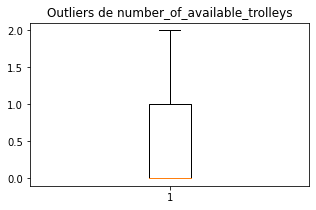

In [32]:
#Realizamos diagrama de caja o bigote de cada columna del 
fig=plt.figure(figsize=(5,3))
plt.boxplot(data_clean_iqr["number_of_available_trolleys"])
plt.title("Outliers de number_of_available_trolleys")
plt.show() 


In [33]:
#Realizamos una copia del dataframe
data3=data_clean_iqr.copy()

In [34]:
from numpy.lib.function_base import percentile
y=micro['number_of_operators']
percentile25=y.quantile(0.25) 
percentile75=y.quantile(0.75) 
iqr=percentile75 -percentile25
Limite_superior_iqr=percentile75 + 1.5*iqr
Limite_inferior_iqr=percentile25 - 1.5*iqr
print('Limite superior permitido',Limite_superior_iqr)
print('Limite inferior permitido', Limite_inferior_iqr)

Limite superior permitido 3.5
Limite inferior permitido -0.5


In [ ]:
#Encontramos outliers del dataframe
outliers_iqr=micro[(y<Limite_superior_iqr)|(y>Limite_inferior_iqr)]
outliers_iqr

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del 
fig=plt.figure(figsize=(5,5))
plt.boxplot(data_clean_iqr["number_of_operators"])
plt.title("Outliers de number_of_operators")
plt.show()

In [ ]:
#Convertir dataframe a CSV
from google.colab import files 
files.download('lastmile_delivery_operaions.csv')